# Error Plot JCPexample5

## Cavity Flow

## Import stuff

In [1]:
import torch
import torch.nn as nn
import os
import sys
import numpy as np
import math
import scipy.special as bessel
from scipy.io import loadmat

import DRLPDE_nn
import DRLPDE_param_solver
import DRLPDE_functions.DefineDomain
import DRLPDE_functions.EvaluateWalkers

import matplotlib.pyplot as plt
import cv2

import matplotlib as mpl

mpl.rcParams['figure.dpi']= 300
plt.rcParams['text.usetex'] = True
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Helvetica']


## Error Plot

In [2]:
loadmodel = 'JCPexample5'

imagefilename = 'Error_Plot_' + loadmodel
imagesfolder = "images/"

model = torch.load("savedmodels/" + loadmodel + ".pt").to('cpu')

### Setup Variables and Calculate Error

In [3]:

### Domain Parameters
dim_space = 2
dim_full = dim_space

L = 1
v0 = 1

### Error Grid
numplotpts1d = 128
numplotpts = numplotpts1d**2

x1g, x2g = torch.meshgrid([torch.linspace(-L, L, numplotpts1d), 
                           torch.linspace(-L, L, numplotpts1d)])
xg = torch.stack((x1g.reshape(-1), x2g.reshape(-1)), dim=1).requires_grad_(True)
integral_factor = ( 2/(numplotpts1d-1))**dim_space

### Load Finite Difference Solution
contents = loadmat('tools/Cavity_Flow_2D_Data_128x128.mat')
u1_true = np.transpose(contents['u'])
u2_true = np.transpose(contents['v'])
u_true = np.concatenate( (u1_true[:,:,None], u2_true[:,:,None]), axis=dim_space)


### Evaluate the model

Trained_Vel = model(xg).reshape(numplotpts1d, numplotpts1d, 2).detach().numpy()

Trained_Vel_U = Trained_Vel[:,:,0]
Trained_Vel_V = Trained_Vel[:,:,1]

### Errors

L2_error = np.sqrt( np.sum( np.square(Trained_Vel_U - u1_true)*integral_factor) \
                   + np.sum( np.square(Trained_Vel_V - u2_true)*integral_factor))
Linf_error = np.amax( [np.amax( np.abs( Trained_Vel_U - u1_true)), 
                        np.amax( np.abs( Trained_Vel_V - u2_true))] )

L2_norm_true = np.sqrt( np.sum( np.square(u1_true)*integral_factor) \
                         + np.sum( np.square(u2_true)*integral_factor))

Linf_norm_true = np.amax( [np.amax(np.abs(u1_true)), np.amax(np.abs(u2_true))] )

print('L2 error is {:.5f}'.format(L2_error))
print('Linf error is {:.5f}'.format(Linf_error))

print('Relative L2 error is {:.5f}'.format(L2_error/L2_norm_true))
print('Relative Linf error is {:.5f}'.format(Linf_error/Linf_norm_true))


L2 error is 0.33270
Linf error is 1.03292
Relative L2 error is 0.65066
Relative Linf error is 1.03292


C:\Users\Kevin\AppData\Local\Programs\Python\Python310\lib\site-packages\torch\functional.py:568: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  ..\aten\src\ATen\native\TensorShape.cpp:2228.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


### Plot

[Text(0, -1.0, ''),
 Text(0, -0.5, ''),
 Text(0, 0.0, ''),
 Text(0, 0.5, ''),
 Text(0, 1.0, '')]

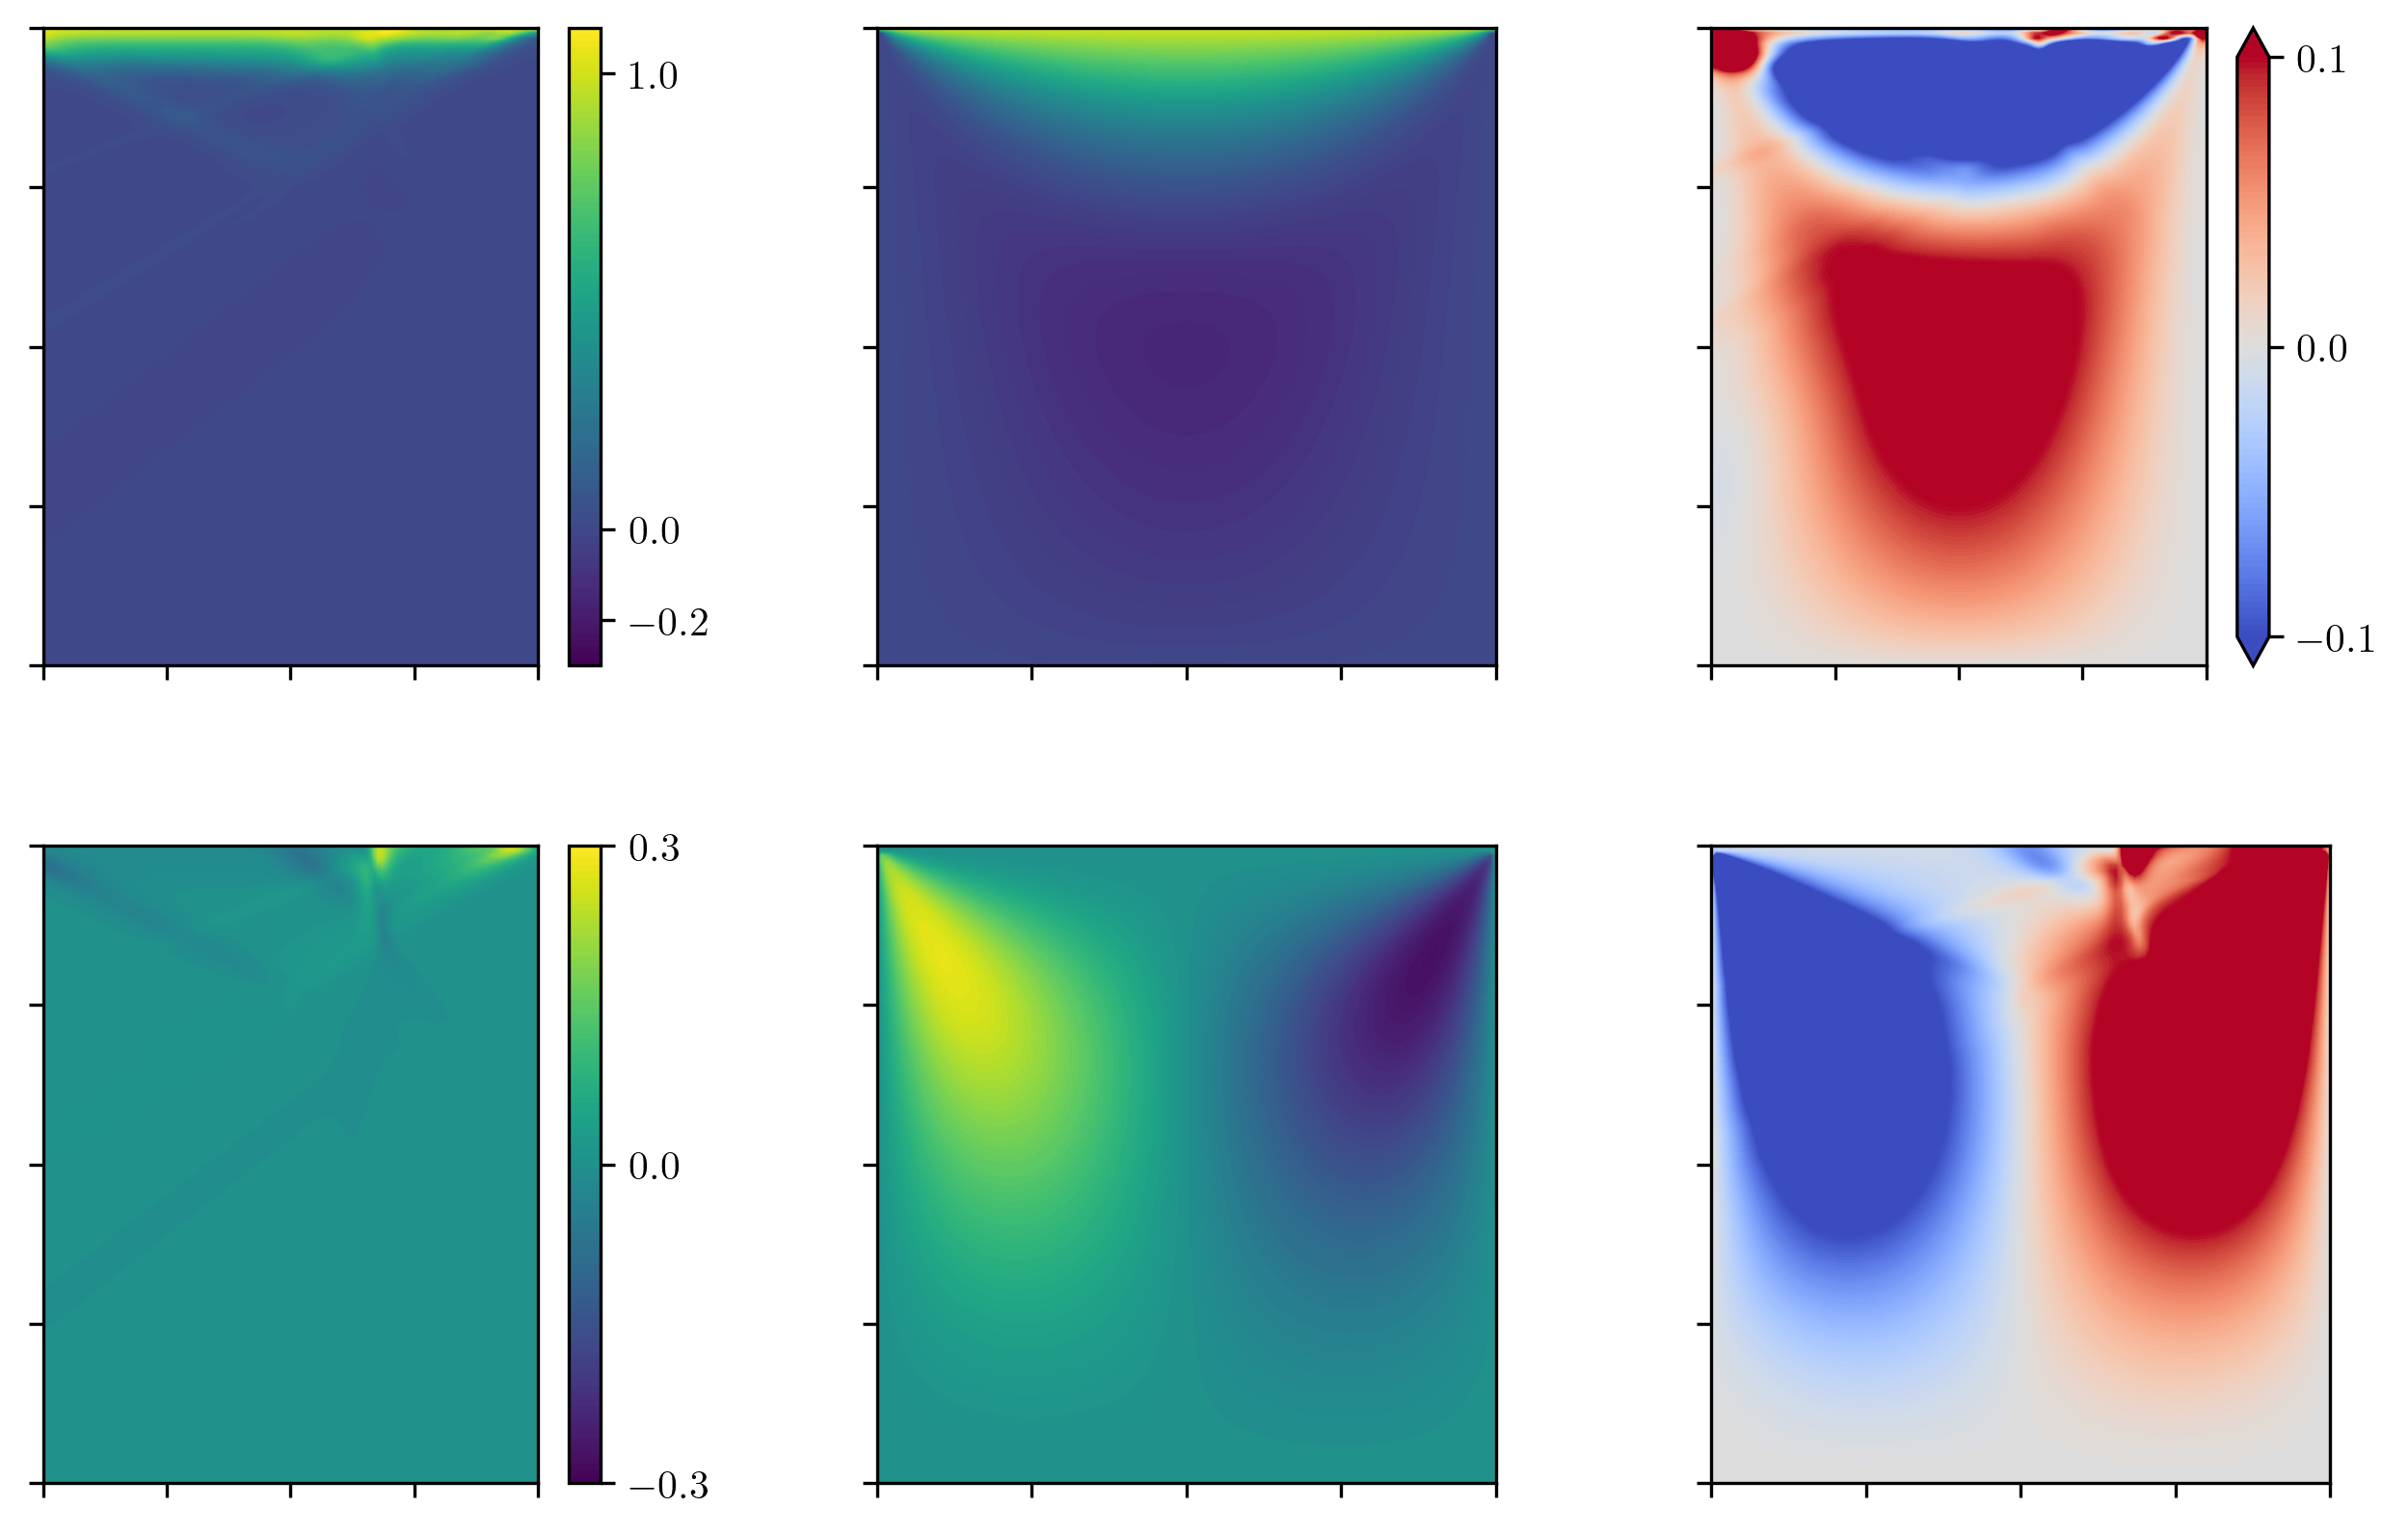

In [4]:
### Plotting

levels_cavity_flow_1 = np.linspace(-0.3, 1.1, 100)
ticks_cavity_flow_1  = [-0.2, 0.0, 1.0] #np.linspace(-0.2, 1.0, 2)

levels_cavity_flow_2 = np.linspace(-0.3, 0.3, 100)
ticks_cavity_flow_2  = np.linspace(-0.3, 0.3, 3)

levels_error = np.linspace(-0.1, 0.1, 100)
ticks_error = np.linspace(-0.1, 0.1, 3)

fig, ax = plt.subplots(nrows = 2, ncols = 3, figsize=(9,6))
fig.tight_layout(pad=2.5)

contour0 = ax[0,0].contourf(x1g.detach().cpu().numpy(), 
                            x2g.detach().cpu().numpy(), 
                            Trained_Vel_U, levels = levels_cavity_flow_1, 
                            cmap=plt.cm.viridis)
#ax[0,0].set_xlabel(r'$x_1$')
#ax[0,0].set_ylabel(r'$x_2$')
#ax[0,0].set_title(r'$u_1$')
ax[0,0].set_xticklabels([])
ax[0,0].set_yticklabels([])
plt.colorbar(contour0, ticks =ticks_cavity_flow_1, ax=ax[0,0])

contour1 = ax[0,1].contourf(x1g.detach().cpu().numpy(), 
                            x2g.detach().cpu().numpy(), 
                            u1_true, levels = levels_cavity_flow_1, 
                            cmap=plt.cm.viridis)
#ax[0,1].set_xlabel(r'$x_1$')
#ax[0,1].set_ylabel(r'$x_2$')
ax[0,1].set_xticklabels([])
ax[0,1].set_yticklabels([])
#plt.colorbar(contour1, ticks =ticks_cavity_flow_1, ax=ax[0,1])

contour2 = ax[0,2].contourf(x1g.detach().cpu().numpy(), 
                            x2g.detach().cpu().numpy(), 
                            Trained_Vel_U - u1_true, levels = levels_error,
                            cmap=plt.cm.coolwarm, extend='both')
#ax[0,2].set_xlabel(r'$x_1$')
#ax[0,2].set_ylabel(r'$x_2$')
ax[0,2].set_xticklabels([])
ax[0,2].set_yticklabels([])
plt.colorbar(contour2, ticks = ticks_error, ax=ax[0,2])

contour3 = ax[1,0].contourf(x1g.detach().cpu().numpy(), 
                            x2g.detach().cpu().numpy(), 
                            Trained_Vel_V, levels = levels_cavity_flow_2, 
                            cmap=plt.cm.viridis)
#ax[1,0].set_xlabel(r'$x_1$')
#ax[1,0].set_ylabel(r'$x_2$')
ax[1,0].set_xticklabels([])
ax[1,0].set_yticklabels([])
plt.colorbar(contour3, ticks =ticks_cavity_flow_2, ax=ax[1,0])

contour4 = ax[1,1].contourf(x1g.detach().cpu().numpy(), 
                            x2g.detach().cpu().numpy(), 
                            u2_true, levels = levels_cavity_flow_2, 
                            cmap=plt.cm.viridis)
#ax[1,1].set_xlabel(r'$x_1$')
#ax[1,1].set_ylabel(r'$x_2$')
ax[1,1].set_xticklabels([])
ax[1,1].set_yticklabels([])
#plt.colorbar(contour4, ticks =ticks_cavity_flow_2, ax=ax[1,1])

contour5 = ax[1,2].contourf(x1g.detach().cpu().numpy(), 
                            x2g.detach().cpu().numpy(), 
                            Trained_Vel_V - u2_true, levels = levels_error,
                            cmap=plt.cm.coolwarm, extend='both')
#ax[1,2].set_xlabel(r'$x_1$')
#ax[1,2].set_ylabel(r'$x_2$')
ax[1,2].set_xticklabels([])
ax[1,2].set_yticklabels([])
#plt.colorbar(contour5, ticks = ticks_error, ax=ax[1,2])